In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


file="all"
traindir="datasets/multiclass_train"
testdir="datasets/multiclass_test"

traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
testdata
traindata
n=len(traindata.count())
print(f"no of attributes are {n}")

Using TensorFlow backend.


no of attributes are 48


In [3]:
X = traindata.iloc[:,0:n-5]
Y = traindata.iloc[:,n-5:n]
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
Y.shape

(125973, 5)

In [4]:
# 1. define the network
model = Sequential()
model.add(Dense(32,input_dim=n-5,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(5, activation='softmax'))

In [5]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X, Y,batch_size=4000,epochs=100,validation_split=0.2)

model.save(f"{testdir}/processed/{file}.hdf5")

import dill as pickle
with open('history', 'wb') as file_pi:
    pickle.dump(f"{testdir}/processed/{file}.history", file_pi)

Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 1s 6us/step - loss: 1.4555 - accuracy: 0.5041 - val_loss: 1.1426 - val_accuracy: 0.8706
Epoch 2/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.9109 - accuracy: 0.8694 - val_loss: 0.6705 - val_accuracy: 0.8680
Epoch 3/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.5390 - accuracy: 0.8675 - val_loss: 0.4209 - val_accuracy: 0.8683
Epoch 4/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.3685 - accuracy: 0.8793 - val_loss: 0.3084 - val_accuracy: 0.9065
Epoch 5/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.2783 - accuracy: 0.9181 - val_loss: 0.2390 - val_accuracy: 0.9263
Epoch 6/100
100778/100778 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.94 - 0s 3us/step - loss: 0.2227 - accuracy: 0.9420 - val_loss: 0.1982 - val_accuracy: 0.9529
Epoch 7/100
1

100778/100778 [==============================] - 0s 4us/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 56/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 57/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0397 - accuracy: 0.9869 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 58/100
100778/100778 [==============================] - 0s 4us/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 59/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 60/100
100778/100778 [==============================] - 0s 4us/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 61/100
100778/100778 [==============================] - 0s 4us/step - loss: 0.0376 - accuracy: 0.9880 - val

In [6]:

import tensorflow as tf
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
_, accuracy = model.evaluate(C,T)
print('Accuracy: %.2f' % (accuracy*100))
prediction=model.predict_classes(C)


22542/22542 [==============================] - 0s 14us/step
Accuracy: 74.80


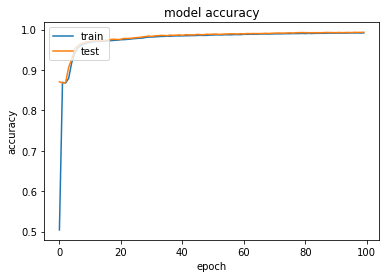

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

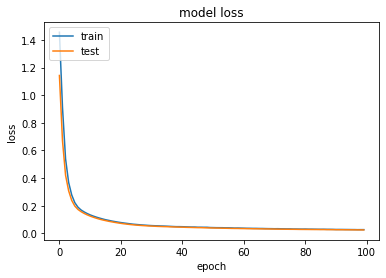

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
p=model.predict(C[0:1])
p=np.rint(p)

print(p)
print(T.shape)
rounded_labels=np.argmax(T.to_numpy(),axis=1)
prediction=model.predict(C)
prediction=np.rint(prediction)
prediction

[[1. 0. 0. 0. 0.]]
(22542, 5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
prediction=np.rint(prediction)
original_value=np.rint(T)
cm=multilabel_confusion_matrix(original_value, prediction)
cm

array([[[14854,   229],
        [ 1806,  5653]],

       [[ 7746,  5086],
        [  235,  9475]],

       [[19788,   333],
        [  713,  1708]],

       [[19642,    15],
        [ 2873,    12]],

       [[22474,     1],
        [   66,     1]]], dtype=int64)